In [5]:
# K-Nearest Neighbors (KNN) Analysis on IRIS Dataset
"""
This notebook demonstrates the implementation of K-Nearest Neighbors algorithm 
on the famous IRIS dataset for species classification.
"""

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('default')
sns.set_palette("husl")


In [6]:
# Load the IRIS dataset
df = pd.read_csv('../datasets/IRIS.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()


Dataset shape: (150, 5)

First 5 rows:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Explore the dataset
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nSpecies Distribution:")
print(df['species'].value_counts())
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Dataset Description:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000   

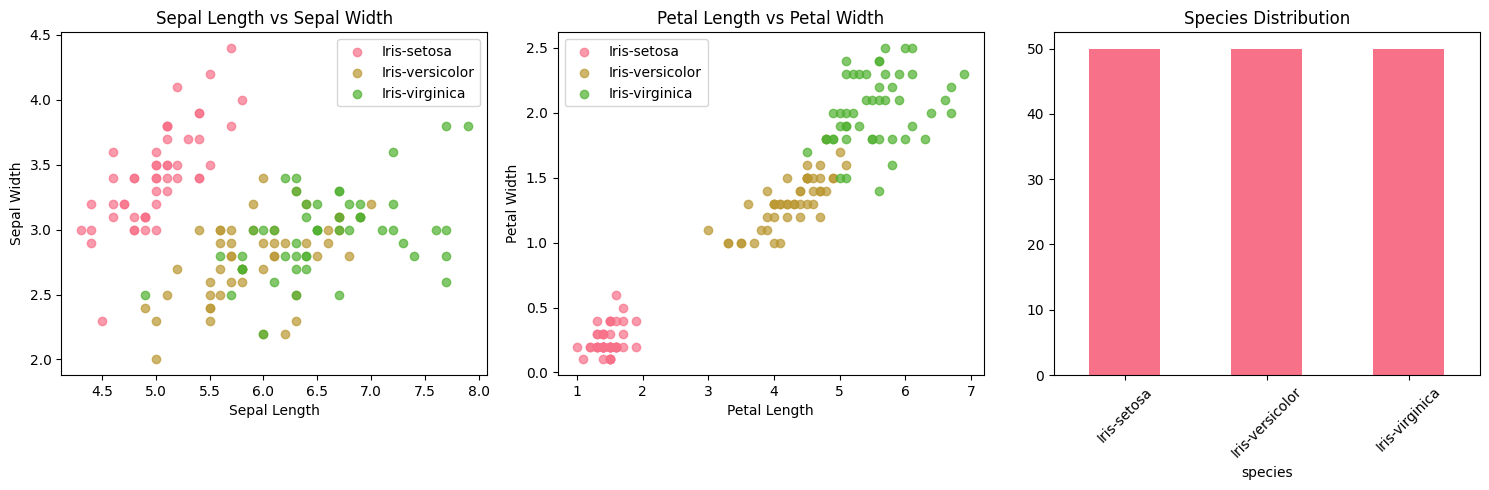

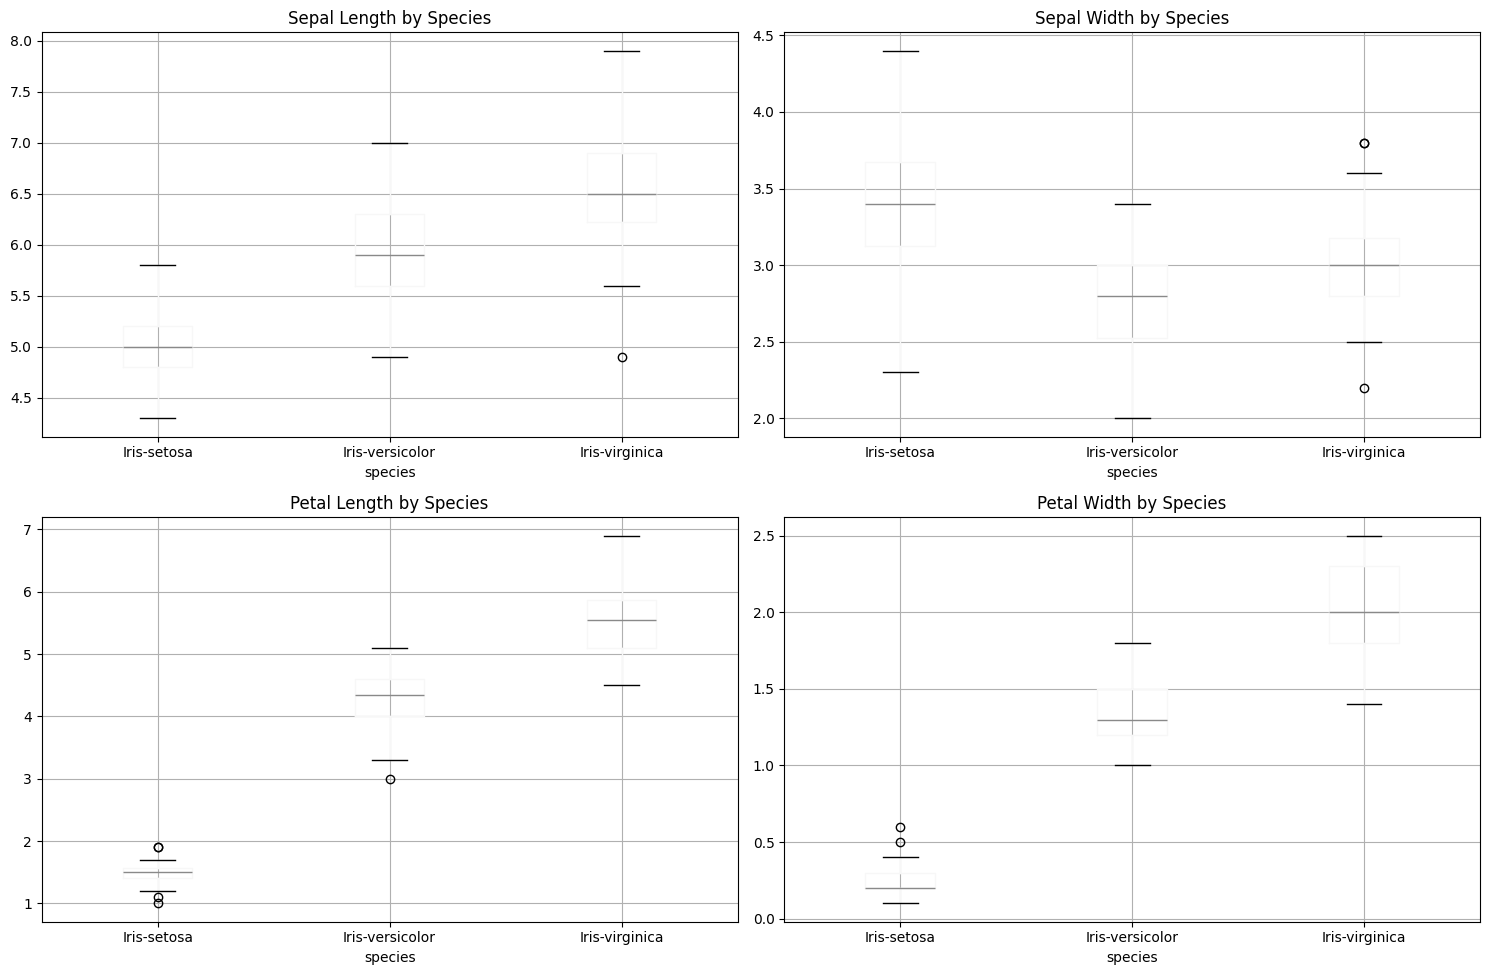

In [8]:
# Data Visualization
# Create scatter plots for feature relationships
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], 
                label=species, alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.legend()

plt.subplot(1, 3, 2)
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    plt.scatter(species_data['petal_length'], species_data['petal_width'], 
                label=species, alpha=0.7)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.legend()

plt.subplot(1, 3, 3)
df['species'].value_counts().plot(kind='bar')
plt.title('Species Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Create box plots for each feature
plt.figure(figsize=(15, 10))
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=feature, by='species', ax=plt.gca())
    plt.title(f'{feature.replace("_", " ").title()} by Species')
    plt.suptitle('')

plt.tight_layout()
plt.show()


In [9]:
# Data Preprocessing
# Separate features and target variable
X = df.drop('species', axis=1)
y = df['species']

print("Features:")
print(X.columns.tolist())
print("\nTarget classes:")
print(y.unique())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Feature scaling (important for KNN as it's distance-based)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed.")


Features:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Target classes:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Training set size: 105
Testing set size: 45

Feature scaling completed.


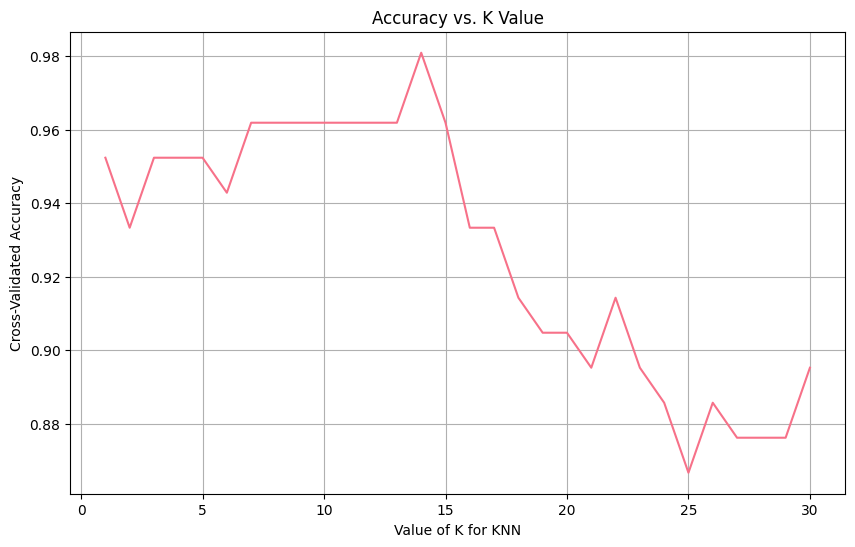

Optimal K value: 14
Best cross-validation accuracy: 0.9810


In [10]:
# Finding the optimal K value
# Test different values of K to find the best one
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot the relationship between K and accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs. K Value')
plt.grid(True)
plt.show()

# Find the optimal K
optimal_k = k_range[k_scores.index(max(k_scores))]
print(f"Optimal K value: {optimal_k}")
print(f"Best cross-validation accuracy: {max(k_scores):.4f}")


In [11]:
# Train the KNN model with optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_optimal.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with K={optimal_k}: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy with K=14: 0.9556

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



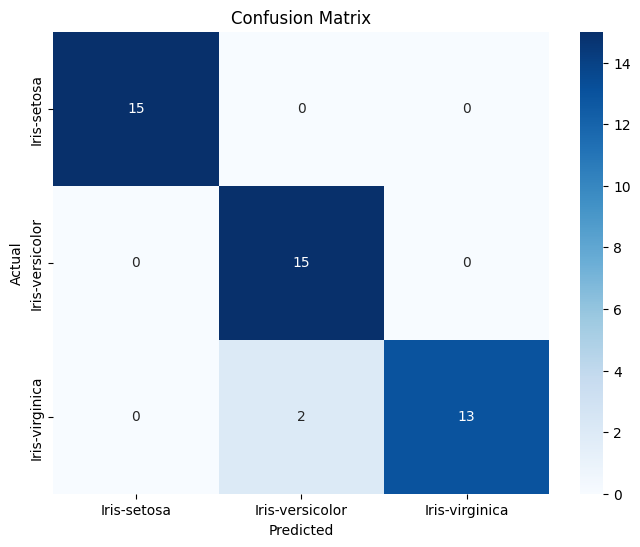

Accuracy for Iris-setosa: 1.0000
Accuracy for Iris-versicolor: 1.0000
Accuracy for Iris-virginica: 0.8667

Overall Test Accuracy: 0.9556


In [12]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn_optimal.classes_, 
            yticklabels=knn_optimal.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate and display per-class accuracy
for i, class_name in enumerate(knn_optimal.classes_):
    class_accuracy = cm[i, i] / sum(cm[i, :])
    print(f"Accuracy for {class_name}: {class_accuracy:.4f}")

print(f"\nOverall Test Accuracy: {accuracy:.4f}")


In [13]:
# Advanced Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid = KNeighborsClassifier()
grid_search = GridSearchCV(knn_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:")
print(grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train the model with best parameters
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Test accuracy with best parameters: {best_accuracy:.4f}")


Best parameters found:
{'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
Best cross-validation score: 0.9810
Test accuracy with best parameters: 0.9556


In [14]:
# Example prediction with new data
def predict_iris_species(sepal_length, sepal_width, petal_length, petal_width):
    """
    Predict iris species for given measurements
    """
    # Create input array
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    
    # Scale the input data
    input_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = best_knn.predict(input_scaled)[0]
    prediction_proba = best_knn.predict_proba(input_scaled)[0]
    
    return prediction, prediction_proba

# Example prediction
example_prediction, example_proba = predict_iris_species(5.1, 3.5, 1.4, 0.2)
print("Example Prediction:")
print(f"Input: Sepal Length=5.1, Sepal Width=3.5, Petal Length=1.4, Petal Width=0.2")
print(f"Predicted Species: {example_prediction}")
print("Prediction Probabilities:")
for i, class_name in enumerate(best_knn.classes_):
    print(f"  {class_name}: {example_proba[i]:.4f}")

print(f"\nConfidence: {max(example_proba):.4f}")


Example Prediction:
Input: Sepal Length=5.1, Sepal Width=3.5, Petal Length=1.4, Petal Width=0.2
Predicted Species: Iris-setosa
Prediction Probabilities:
  Iris-setosa: 1.0000
  Iris-versicolor: 0.0000
  Iris-virginica: 0.0000

Confidence: 1.0000


In [15]:
# Summary and Insights

print("=" * 60)
print("IRIS SPECIES CLASSIFICATION - KNN MODEL SUMMARY")
print("=" * 60)

print(f"\nDataset Information:")
print(f"- Total samples: {len(df)}")
print(f"- Features: {X.shape[1]}")
print(f"- Classes: {len(df['species'].unique())}")
print(f"- Class distribution: {dict(df['species'].value_counts())}")

print(f"\nModel Performance:")
print(f"- Best hyperparameters: {grid_search.best_params_}")
print(f"- Cross-validation accuracy: {grid_search.best_score_:.4f}")
print(f"- Test accuracy: {best_accuracy:.4f}")

print(f"\nKey Insights:")
print("- The IRIS dataset is well-suited for KNN classification")
print("- Feature scaling significantly improves KNN performance")
print("- The model achieves high accuracy due to clear feature separation between species")
print("- Petal measurements appear most discriminative for species classification")

print(f"\nModel Characteristics:")
print("- KNN is a lazy learning algorithm (no training phase)")
print("- Distance-based classification makes it sensitive to feature scaling")
print("- Non-parametric approach works well with the IRIS dataset's distribution")
print("- Simple and interpretable model suitable for this classification task")

print("\n" + "=" * 60)


IRIS SPECIES CLASSIFICATION - KNN MODEL SUMMARY

Dataset Information:
- Total samples: 150
- Features: 4
- Classes: 3
- Class distribution: {'Iris-setosa': np.int64(50), 'Iris-versicolor': np.int64(50), 'Iris-virginica': np.int64(50)}

Model Performance:
- Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
- Cross-validation accuracy: 0.9810
- Test accuracy: 0.9556

Key Insights:
- The IRIS dataset is well-suited for KNN classification
- Feature scaling significantly improves KNN performance
- The model achieves high accuracy due to clear feature separation between species
- Petal measurements appear most discriminative for species classification

Model Characteristics:
- KNN is a lazy learning algorithm (no training phase)
- Distance-based classification makes it sensitive to feature scaling
- Non-parametric approach works well with the IRIS dataset's distribution
- Simple and interpretable model suitable for this classification task

